In [1]:
import torch
from torch.distributions import Normal, MultivariateNormal
from torch.distributions.lowrank_multivariate_normal import LowRankMultivariateNormal

from cnp.cnp import (
    StandardGNP,
    StandardAGNP,
    StandardConvGNP
)

from cnp.cov import (
    OutputLayer,
    MeanFieldGaussianLayer,
    InnerprodGaussianLayer,
    KvvGaussianLayer,
    LogLogitCopulaLayer
)

import matplotlib.pyplot as plt

# Mean field layer

In [2]:
mfg_layer = MeanFieldGaussianLayer()

In [3]:
B = 1
T = 7
C = 2

tensor = torch.rand(B, T, C)

mfg_layer.mean_and_cov(tensor)

(tensor([[0.3813, 0.2499, 0.2827, 0.7640, 0.4892, 0.7288, 0.7960]]),
 tensor([[[1.0549, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.9752, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.7222, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 1.0473, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 1.0391, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0362, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9455]]]),
 tensor([[[1.7480, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 1.6683, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 1.4154, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 1.7405, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 1.7322, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.7293, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0

In [4]:
B = 2
T = 7
C = 2

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

mfg_layer.loglik(tensor, y_target)

tensor([-8.5364, -8.5429], grad_fn=<SubBackward0>)

In [5]:
B = 1
T = 7
C = 2
num_samples = 3

tensor = torch.rand(B, T, C)

print(mfg_layer.sample(tensor, num_samples=num_samples, noiseless=False).shape)
print(mfg_layer.sample(tensor, num_samples=num_samples, noiseless=True).shape)

torch.Size([3, 1, 7])
torch.Size([3, 1, 7])


# Innerprod layer

In [6]:
num_embedding = 100
noise_type = "hetero"

innerprod_layer = InnerprodGaussianLayer(num_embedding=num_embedding,
                                         noise_type=noise_type)

In [7]:
B = 1
T = 7
C = num_embedding + 1 + int(noise_type == "hetero")

tensor = torch.rand(B, T, C)

innerprod_layer.mean_and_cov(tensor)

(tensor([[0.5142, 0.3714, 0.5734, 0.6595, 0.7321, 0.7927, 0.5328]]),
 tensor([[[0.3459, 0.2769, 0.2770, 0.2636, 0.2584, 0.2823, 0.2359],
          [0.2769, 0.3500, 0.2726, 0.2666, 0.2420, 0.2803, 0.2270],
          [0.2770, 0.2726, 0.3758, 0.2667, 0.2427, 0.2702, 0.2344],
          [0.2636, 0.2666, 0.2667, 0.3246, 0.2396, 0.2647, 0.2223],
          [0.2584, 0.2420, 0.2427, 0.2396, 0.3077, 0.2357, 0.2015],
          [0.2823, 0.2803, 0.2702, 0.2647, 0.2357, 0.3588, 0.2383],
          [0.2359, 0.2270, 0.2344, 0.2223, 0.2015, 0.2383, 0.2788]]]),
 tensor([[[1.1351, 0.2769, 0.2770, 0.2636, 0.2584, 0.2823, 0.2359],
          [0.2769, 1.1155, 0.2726, 0.2666, 0.2420, 0.2803, 0.2270],
          [0.2770, 0.2726, 1.3118, 0.2667, 0.2427, 0.2702, 0.2344],
          [0.2636, 0.2666, 0.2667, 1.2163, 0.2396, 0.2647, 0.2223],
          [0.2584, 0.2420, 0.2427, 0.2396, 1.0851, 0.2357, 0.2015],
          [0.2823, 0.2803, 0.2702, 0.2647, 0.2357, 1.2756, 0.2383],
          [0.2359, 0.2270, 0.2344, 0.2223, 0

In [8]:
B = 3
T = 10000
C = num_embedding + 1 + int(noise_type == "hetero")

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

%time _ = innerprod_layer.loglik(tensor, y_target)

CPU times: user 63.7 ms, sys: 33.3 ms, total: 96.9 ms
Wall time: 65.4 ms


In [9]:
B = 3
T = 10000
C = num_embedding + 1 + int(noise_type == "hetero")
num_samples = 5

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

%time _ = innerprod_layer.loglik(tensor, y_target)

CPU times: user 55.5 ms, sys: 5.82 ms, total: 61.3 ms
Wall time: 31.3 ms


# Kvv layer

In [10]:
num_embedding = 10
noise_type = "homo"

kvv_layer = KvvGaussianLayer(num_embedding=num_embedding,
                             noise_type=noise_type)

In [11]:
B = 1
T = 7
C = 12

tensor = torch.rand(B, T, C)

kvv_layer.mean_and_cov(tensor)

(tensor([[0.1491, 0.9274, 0.3124, 0.3281, 0.5407, 0.6042, 0.3796]]),
 tensor([[[0.0245, 0.0963, 0.0383, 0.0511, 0.0342, 0.0621, 0.0722],
          [0.0963, 0.9636, 0.2060, 0.2887, 0.1493, 0.5970, 0.4700],
          [0.0383, 0.2060, 0.3435, 0.1150, 0.0579, 0.3239, 0.1498],
          [0.0511, 0.2887, 0.1150, 0.2458, 0.0922, 0.2099, 0.1882],
          [0.0342, 0.1493, 0.0579, 0.0922, 0.1147, 0.1137, 0.2189],
          [0.0621, 0.5970, 0.3239, 0.2099, 0.1137, 0.6710, 0.3847],
          [0.0722, 0.4700, 0.1498, 0.1882, 0.2189, 0.3847, 0.8155]]]),
 tensor([[[0.7176, 0.0963, 0.0383, 0.0511, 0.0342, 0.0621, 0.0722],
          [0.0963, 1.6568, 0.2060, 0.2887, 0.1493, 0.5970, 0.4700],
          [0.0383, 0.2060, 1.0367, 0.1150, 0.0579, 0.3239, 0.1498],
          [0.0511, 0.2887, 0.1150, 0.9389, 0.0922, 0.2099, 0.1882],
          [0.0342, 0.1493, 0.0579, 0.0922, 0.8078, 0.1137, 0.2189],
          [0.0621, 0.5970, 0.3239, 0.2099, 0.1137, 1.3642, 0.3847],
          [0.0722, 0.4700, 0.1498, 0.1882, 0

In [12]:
B = 3
T = 7
C = 12

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

kvv_layer.loglik(tensor, y_target)

tensor([-7.3594, -6.9951, -7.3774], grad_fn=<SubBackward0>)

In [13]:
B = 3
T = 7
C = 12
num_samples = 5

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

print(kvv_layer.sample(tensor, num_samples=num_samples, noiseless=False).shape)
print(kvv_layer.sample(tensor, num_samples=num_samples, noiseless=True).shape)

torch.Size([5, 3, 7])
torch.Size([5, 3, 7])


# Log-logit copula layer

In [14]:
num_embedding = 100
noise_type = "homo"

gaussian_layer = KvvGaussianLayer(num_embedding=num_embedding,
                                  noise_type=noise_type)

copula_layer = LogLogitCopulaLayer(gaussian_layer=gaussian_layer)

In [15]:
B = 3
T = 7
C = 104

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

copula_layer.loglik(tensor, y_target)

tensor([ -2.3402,  -7.4003, -11.9648], grad_fn=<AddBackward0>)

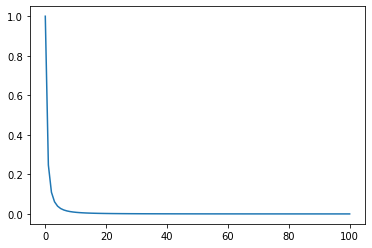

In [16]:
x = torch.linspace(1e-9, 100., 100)
a = 1.*torch.ones_like(x)
b = 1.*torch.ones_like(x)

pdf = copula_layer.pdf(x, a, b).numpy()

plt.plot(x, pdf)
plt.show()

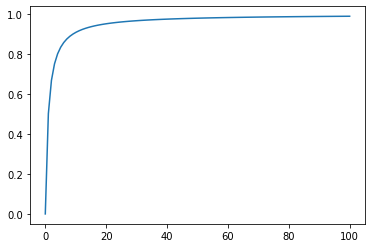

In [17]:
x = torch.linspace(1e-9, 100., 100)
a = 1.*torch.ones_like(x)
b = 1.*torch.ones_like(x)

cdf = copula_layer.cdf(x, a, b).numpy()

plt.plot(x, cdf)
plt.show()

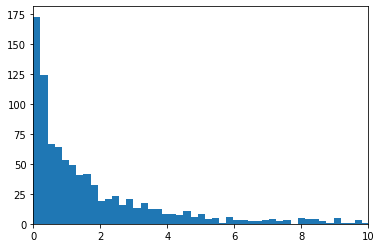

In [18]:
x = torch.rand(1000)
a = 1.*torch.ones_like(x)
b = 1.*torch.ones_like(x)

plt.hist(copula_layer.icdf(x, a, b).numpy(), bins=5000)
plt.xlim([0, 10])
plt.show()

torch.Size([100]) torch.Size([100]) torch.Size([100])


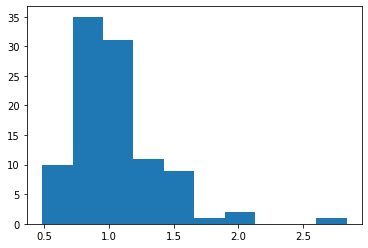

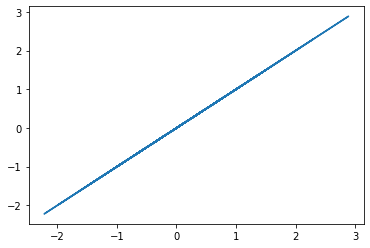

In [19]:
x = torch.randn(100)
a = 1.*torch.ones_like(x)
b = 6.*torch.ones_like(x)

y = copula_layer.marginal_transformation(x, a, b)

plt.hist(y.numpy())
plt.show()

x_ = copula_layer.inverse_marginal_transformation(y, a, b).numpy()

plt.plot(x, x_)
plt.show()

torch.Size([1000]) torch.Size([1000]) torch.Size([1000])


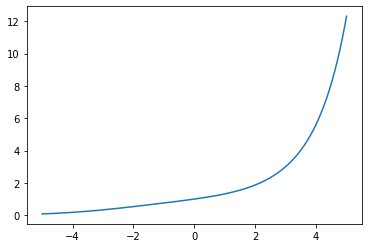

In [20]:
x = torch.linspace(-5., 5., 1000)
a = 1.*torch.ones_like(x)
b = 6.*torch.ones_like(x)

y = copula_layer.marginal_transformation(x, a, b)

plt.plot(x, y)
plt.show()

In [21]:
# =============================================================================
# Log-logit copula output layer
# =============================================================================

class LogLogitCopulaLayer(OutputLayer):
    
    
    def __init__(self, gaussian_layer):
        
        super().__init__()
        
        # Initialise Gaussian layer
        self.gaussian_layer = gaussian_layer
        
        # Number of features equal to number of Gaussian layer features plus
        # two additional features for the Gamma - rate and concentration
        self.num_features = self.gaussian_layer.num_features + 2

    
    def loglik(self, tensor, y_target):
        """
        Arguments:
            tensor   : torch.tensor, (B, T, C)
            y_target : torch.tensor, (B, T)
            
        Returns:
            tensor : torch.tensor, (B, T)
        """
        
        # Unpack parameters and apply inverse transformation
        tensor, a, b = self.unpack_parameters(tensor=tensor)
        v_target = self.inverse_marginal_transformation(x=y_target,
                                                        a=a,
                                                        b=b)
        
        # Log-likelihood of transformed variables under Gaussian
        loglik = self.gaussian_layer.loglik(tensor=tensor, y_target=v_target)
        
        # Compute change-of-variables contribution (Jacobian is diagonal)
        grad = self.inverse_marginal_transformation(x=y_target,
                                                    a=a,
                                                    b=b,
                                                    grad=True)
        jacobian_term = torch.sum(torch.log(torch.abs(grad)), dim=-1)
        
        # Ensure shapes are compatible
        assert loglik.shape == jacobian_term.shape
        
        return loglik + jacobian_term

    
    def sample(self, tensor, num_samples, noiseless):
        """
        Arguments:
            tensor      : torch.tensor, (B, T, C)
            num_samples : int, number of samples to draw
            noiseless   : bool, whether to include the noise term
            
        Returns:
            tensor : torch.tensor, (B, T)
        """
        
        # Unpack parameters and apply inverse transformation
        tensor, a, b = self.unpack_parameters(tensor=tensor)
        
        # Draw samples from Gaussian and apply marginal transformation
        v_samples = self.gaussian_layer.sample(tensor=tensor,
                                               num_samples=num_samples,
                                               noiseless=noiseless)
        
        # Repeat a and b, (num_samples, B, T)
        a = a[None, :, :].repeat(num_samples, 1, 1)
        b = b[None, :, :].repeat(num_samples, 1, 1)
        
        # Apply marginal transformation
        samples = self.marginal_transformation(v_samples, a=a, b=b)
        
        return samples
        
        
    def unpack_parameters(self, tensor):
        """
        Arguments:
            tensor : torch.tensor, (B, T, C)
            
        Returns:
            tensor : torch.tensor, (B, T, C-2)
            a      : torch.tensor, (B, T)
            b      : torch.tensor, (B, T)
        """
        
        # Check tensor has correct number of features
        assert (len(tensor.shape) == 3) and \
               (tensor.shape[-1] == self.num_features)
        
        # Get rate and concentration from tensor
        a = torch.nn.Softplus()(tensor[:, :, 0]) + 1e-3
        b = torch.nn.Softplus()(tensor[:, :, 1]) + 1e-3
        
        # Slice out rate and concentration
        tensor = tensor[:, :, 2:]
        
        return tensor, a, b
    
    
    def pdf(self, x, a, b):
        """
        Probability distribution function of the log-logistic distribution.
        
            PDF(x) = (b/a) * (x/a)^(b-1) / (1 + (x/a)^b)^2
        
        Arguments:
            x : torch.tensor, (B, T)
            a : torch.tensor, (B, T)
            b : torch.tensor, (B, T)
            
        Returns:
            tensor : torch.tensor, (B, T)
        """
        
        # Check shapes are compatible, all x values are positive
        assert x.shape == a.shape == b.shape
        assert torch.all(x > 0.)
        
        return (b/a) * (x/a)**(b-1) / (1+(x/a)**b)**2
    
    
    def cdf(self, x, a, b):
        """
        Cumulative distribution function of the log-logistic distribution.
        
            CDF(x) = 1 / (1 + (x/a)^-b)
        
        Arguments:
            x : torch.tensor, (B, T)
            a : torch.tensor, (B, T)
            b : torch.tensor, (B, T)
            
        Returns:
            tensor : torch.tensor, (B, T)
        """
        
        # Check shapes are compatible, all x values are positive
        assert x.shape == a.shape == b.shape
        assert torch.all(x > 0.)
        
        x = x.double()
        a = a.double()
        b = b.double()
        
        cdf = 1 / (1+(x/a)**-b)
        cdf = cdf.float()
        
        return cdf
    
    
    def icdf(self, x, a, b):
        """
        Inverse cumulative distribution function of the log-logistic
        distribution.
        
            CDF^-1(x) = a * (x^-1 - 1)^(-1/b)
        
        Arguments:
            x : torch.tensor, (B, T)
            a : torch.tensor, (B, T)
            b : torch.tensor, (B, T)
            
        Returns:
            tensor : torch.tensor, (B, T)
        """
        
        # Check shapes are compatible, all x values are positive
        assert x.shape == a.shape == b.shape
        assert torch.all(x > 0.)
        
        x = x.double()
        a = a.double()
        b = b.double()
        
        icdf = a * (x**-1 - 1) ** (-1/b)
        icdf = icdf.float()
        
        return icdf
    
    
    def marginal_transformation(self, x, a, b):
        """
        Arguments:
            x : torch.tensor, (B, T)
            a : torch.tensor, (B, T)
            b : torch.tensor, (B, T)
            
        Returns:
            tensor : torch.tensor, (B, T)
        """
        
        # Check shapes are compatible, all x values are positive
        assert x.shape == a.shape == b.shape
        
        zeros = torch.zeros(size=x.shape).double()
        ones = torch.ones(size=x.shape).double()
        
        gaussian = Normal(loc=zeros, scale=ones)
        
        x = gaussian.cdf(x)
        x = self.icdf(x, a, b)
        
        return x
        
        
    def inverse_marginal_transformation(self, x, a, b, grad=False):
        """
        Arguments:
            x : torch.tensor, (B, T)
            a : torch.tensor, (B, T)
            b : torch.tensor, (B, T)
            
        Returns:
            x : torch.tensor, (B, T)
        """
        
        # Check shapes are compatible, all x values are positive
        assert x.shape == a.shape == b.shape
        assert torch.all(x > 0.)
        
        zeros = torch.zeros(size=x.shape).double()
        ones = torch.ones(size=x.shape).double()
        
        gaussian = Normal(loc=zeros, scale=ones)
        
        if grad:
            x = self.pdf(x, a, b) / gaussian.icdf(self.cdf(x, a, b))
            x = x.float()
        
        else:
            x = self.cdf(x, a, b)
            x = gaussian.icdf(x)
            x = x.float()
        
        return x

# Check GNP models

In [22]:
input_dim = 1
num_embedding = 128
noise_type = "hetero"

output_layer = KvvGaussianLayer(num_embedding=num_embedding,
                                noise_type=noise_type)

output_layer = LogLogitCopulaLayer(output_layer)

print(output_layer.num_features)

standard_gnp = StandardConvGNP(input_dim, output_layer)

B = 3
C = 6
T = 7
D = 1

x_ctx = torch.rand(B, C, D)
y_ctx = torch.rand(B, C, 1)
x_trg = torch.rand(B, T, D)
y_trg = torch.rand(B, T, 1)

133


In [23]:
print(standard_gnp.loss(x_ctx, y_ctx, x_trg, y_trg))
print(standard_gnp.sample(x_ctx, y_ctx, x_trg, num_samples=10, noiseless=False).shape)

tensor(-1.5019, grad_fn=<NegBackward>)
torch.Size([10, 3, 7])
